# Задание 3. Pandas (HW)
### Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.  
Результат прислать в формате ссылки на Github с ноутбуком

In [333]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Анализ вспомогательных таблиц

### lectures.csv : метаданные для лекций, просмотренных студентами по мере их обучения.

**lecture_id**: внешний ключ для столбца content_type_id в train.csv, если тип контента - лекция (1).  
**part**: раздел, к которому относится лекция.  
**tag**: один тег для каждой лекции. Значения тегов не представлены, но их достаточно для кластеризации лекций.  
**type_of**: краткое описание основной цели лекции.

In [334]:
dfl = pd.read_csv('data/lectures.csv') # считываем данные из файла lectures.csv в датафрейм dfl
dfl.shape # выводим размерность датафрейма dfl

(418, 4)

In [335]:
dfl.head() # выводим 5 первых строк датафрейма dfl

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [336]:
dfl.describe() # статистика по числовым признакам датафрейма dfl

,lecture_id,tag,part
count,418.000000,418.000000,418.000000
mean,16983.401914,94.480861,4.267943
std,9426.164660,53.586487,1.872424
min,89.000000,0.000000,1.000000
25%,9026.250000,50.250000,2.000000
50%,17161.500000,94.500000,5.000000
75%,24906.250000,140.000000,6.000000
max,32736.000000,187.000000,7.000000


In [337]:
dfl.isna().sum() # ищем пропуски в датафрейме dfl - отсутствуют

lecture_id    0
tag           0
part          0
type_of       0
dtype: int64

In [338]:
dfl.duplicated().sum() # ищем дубликаты в датафрейме dfl - отсутствуют

0

In [339]:
dfl.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма dfl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


In [340]:
# Выводим распеределение внешних ключей по различным разделам лекций
dfl[['type_of', 'part', 'lecture_id']].groupby(['type_of','part'], as_index = False).count().sort_values(by = ['type_of', 'part'])

,type_of,part,lecture_id
0,concept,1,20
1,concept,2,18
2,concept,3,7
3,concept,4,19
4,concept,5,72
5,concept,6,63
6,concept,7,23
7,intention,2,7
8,solving question,1,34
9,solving question,2,31


<AxesSubplot: xlabel='part', ylabel='tag'>

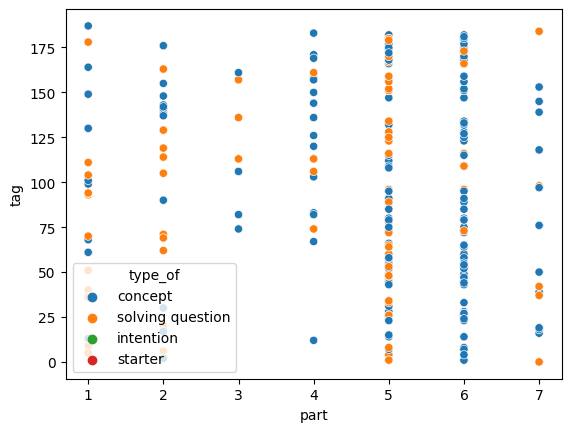

In [341]:
# Выводим распеределение тегов и разделов
sns.scatterplot(data = dfl, x = 'part', y = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='tag', ylabel='Count'>

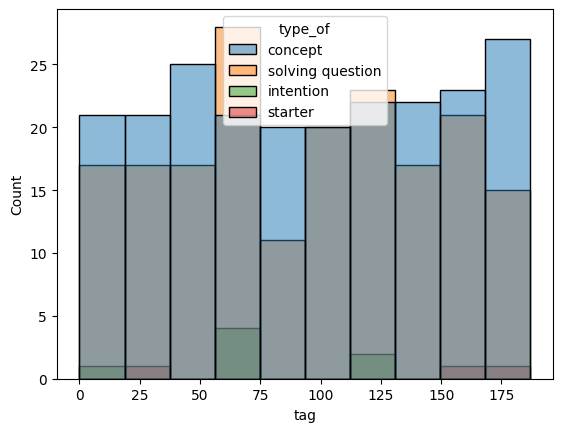

In [342]:
# Явной связи тегов и описаний лекций не видно
sns.histplot(data = dfl, x = 'tag', hue = 'type_of')

<AxesSubplot: xlabel='part', ylabel='Count'>

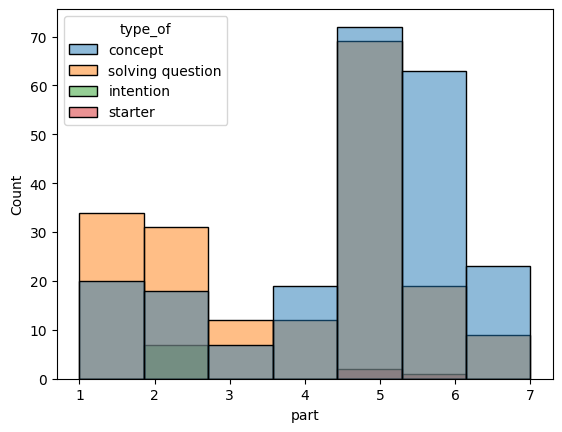

In [343]:
# Выводим связь разделов и описаний лекций: в первых 3-х разделах больше практики, в остальных - теории
sns.histplot(data = dfl, x = 'part', hue = 'type_of', bins = 7)

### questions.csv : метаданные для заданных студентам вопросов.

**question_id**: внешний ключ для столбца content_type_id в train.csv, если тип контента - вопрос (0).  
**bundle_id**: идентификатор совместного набора вопросов.  
**correct_answer**: правильный ответ на вопрос. Можно сравнить со столбцом user_answer в train.csv, чтобы проверить, верно ли ответил студент.  
**part**: соответствующий раздел теста TOEIC.  
**tags**: один или несколько подробных тегов для каждого вопроса. Значения тегов не представлены, но их достаточно для кластеризации вопросов.

In [344]:
dfq = pd.read_csv('data/questions.csv') # считываем данные из файла questions.csv в датафрейм dfq
dfq.shape # выводим размерность датафрейма dfq

(13523, 5)

In [345]:
dfq.head() # выводим 5 первых строк датафрейма dfq

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [346]:
dfq.describe() # статистика по числовым признакам датафрейма dfq

,question_id,bundle_id,correct_answer,part
count,13523.00000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,1.455298,4.264956
std,3903.89818,3903.857783,1.149707,1.652553
min,0.00000,0.000000,0.000000,1.000000
25%,3380.50000,3379.500000,0.000000,3.000000
50%,6761.00000,6761.000000,1.000000,5.000000
75%,10141.50000,10140.000000,3.000000,5.000000
max,13522.00000,13522.000000,3.000000,7.000000


In [347]:
dfq.isna().sum() # ищем пропуски в датафрейме dfq - есть 1 в столбце тегов

question_id       0
bundle_id         0
correct_answer    0
part              0
tags              1
dtype: int64

In [348]:
dfq[dfq.tags.isna()] # выводим 1 пропуск в столбце тегов

,question_id,bundle_id,correct_answer,part,tags
10033,10033,10033,2,6,NaN


In [349]:
dfq.duplicated().sum() # ищем дубликаты в датафрейме dfq - отсутствуют

0

In [350]:
dfq.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма dfq

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


In [351]:
# Выводим кол-во значений внешних ключей, соответствующих каждому значению в столбце разделов
dfq[['part', 'question_id']].groupby(['part'], as_index = False).count()

,part,question_id
0,1,992
1,2,1647
2,3,1562
3,4,1439
4,5,5511
5,6,1212
6,7,1160


<AxesSubplot: xlabel='part', ylabel='Count'>

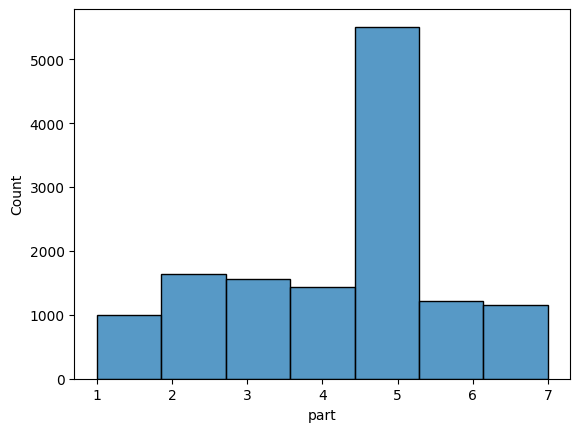

In [352]:
# Внешние ключи распределены практически равномерно по всем разделам, кроме 5
sns.histplot(data = dfq, x = 'part', bins = 7)

## Анализ основной таблицы

### train.csv : метаданные ответов на заданные студентам вопросы.

**row_id**: (int64) идентификатор строки.  
**timestamp**: (int64) время в миллисекундах между этим взаимодействием со студентом и завершением первого события от данного студента.  
**user_id**: (int32) идентификатор студента.  
**content_id**: (int16) идентификатор взаимодействия со студентом.  
**content_type_id**: (int8) идентификатор типа контента. 0, если контентом был заданный студенту вопрос, 1 - просмотр студентом лекции.  
**task_container_id**: (int16) идентификатор набора вопросов или лекций. Например, студент может увидеть три вопроса подряд, прежде чем увидит пояснения к какому-либо из них. Все три вопроса будут иметь общий идентификатор набора.  
**user_answer**: (int8) ответ студента на вопрос, если они есть. Для лекций считать -1 как null.  
**answered_correctly**: (int8) был ли ответ студента на вопрос правильным. Для лекций считать -1 как null.  
**prior_question_elapsed_time**: (float32) среднее время в миллисекундах, затрачиваемое студентом для ответа на каждый вопрос из предыдущего набора вопросов, без учёта промежуточных лекций. Имеет значение null для 1-го набора вопросов или лекции.  
**prior_question_had_explanation**: (bool) увидел ли студент объяснение и правильный ответ после ответа на предыдущий набор вопросов, без учёта промежуточных лекций. Это значение является общим для одного набора вопросов и имеет значение null для 1-го набора вопросов или лекции. Как правило, первые несколько вопросов, увиденные студентом, были частью вводного диагностического теста и не получили никакой обратной связи.

In [353]:
df = pd.read_csv('data/train.csv', nrows = 1000000) # считываем 1000000 строк из файла train.csv в датафрейм df
df.shape # выводим размерность датафрейма df

(1000000, 10)

In [354]:
df.head() # выводим 5 первых строк датафрейма dfq

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


### Анализ числовых признаков

In [355]:
# Посмотрим на то, какие у нас есть категориальные и числовые столбцы
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns += [column_name]
    else:
        num_columns += [column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов =', len(cat_columns))
print('Числовые данные:\t ', num_columns, '\n Число столблцов =', len(num_columns))

Категориальные данные:	  ['prior_question_had_explanation'] 
 Число столблцов = 1
Числовые данные:	  ['row_id', 'timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time'] 
 Число столблцов = 9


In [356]:
df.describe() # статистика по числовым признакам датафрейма df

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,976277.000000
mean,499999.500000,7.344311e+09,1.017255e+07,5232.691523,0.019907,806.105689,1.374784,0.617504,25302.962693
std,288675.278932,1.058693e+10,6.029234e+06,3882.323419,0.139681,1025.887530,1.194168,0.525364,19710.310227
min,0.000000,0.000000e+00,1.150000e+02,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000
25%,249999.750000,5.211669e+08,4.702585e+06,2057.000000,0.000000,109.000000,0.000000,0.000000,16000.000000
50%,499999.500000,2.824811e+09,9.678259e+06,5052.000000,0.000000,391.000000,1.000000,1.000000,21000.000000
75%,749999.250000,1.010186e+10,1.556872e+07,7421.000000,0.000000,1112.000000,3.000000,1.000000,29666.000000
max,999999.000000,7.809200e+10,2.094902e+07,32736.000000,1.000000,7739.000000,3.000000,1.000000,300000.000000


### Рассмотрим гистограммы (распределение) значений по каждому числовому признаку (столбцу)

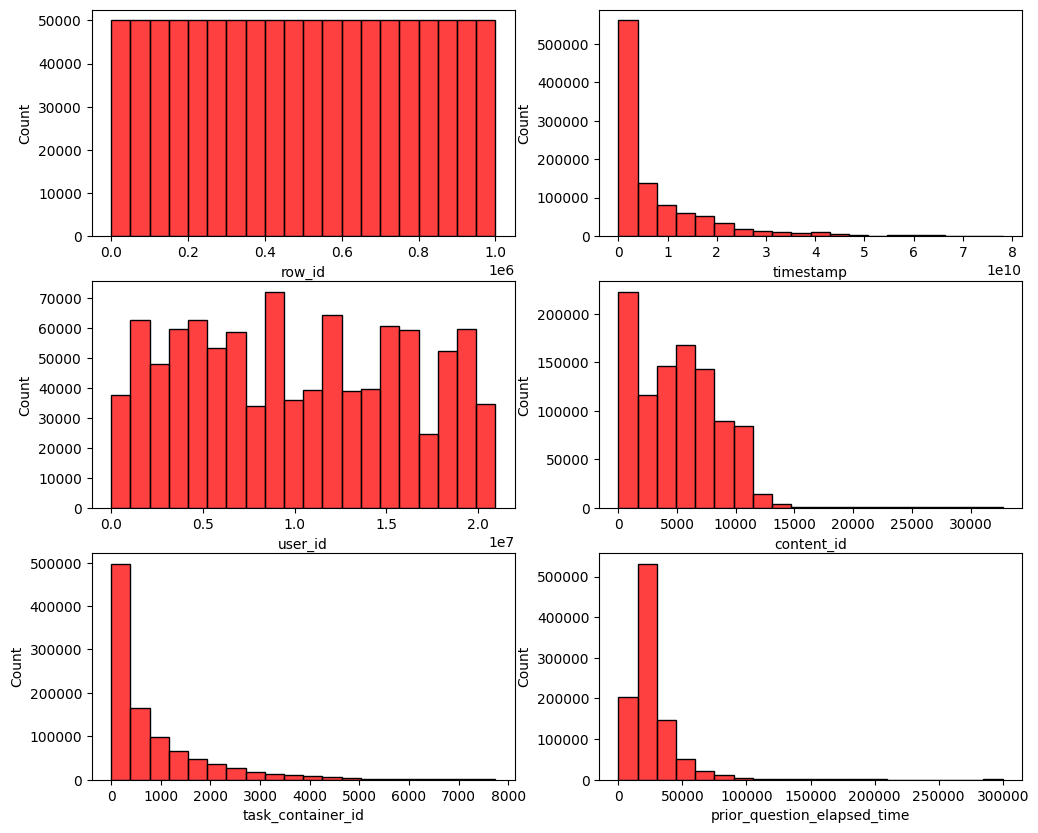

In [357]:
# Сначала столбцы с "большими" значениями
num_col_big = ['row_id', 'timestamp', 'user_id', 'content_id', 'task_container_id', 'prior_question_elapsed_time']
width = 2
height = int(np.ceil(len(num_col_big) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (12, 10))

for idx, column_name in enumerate(num_col_big):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 20, color = 'red')

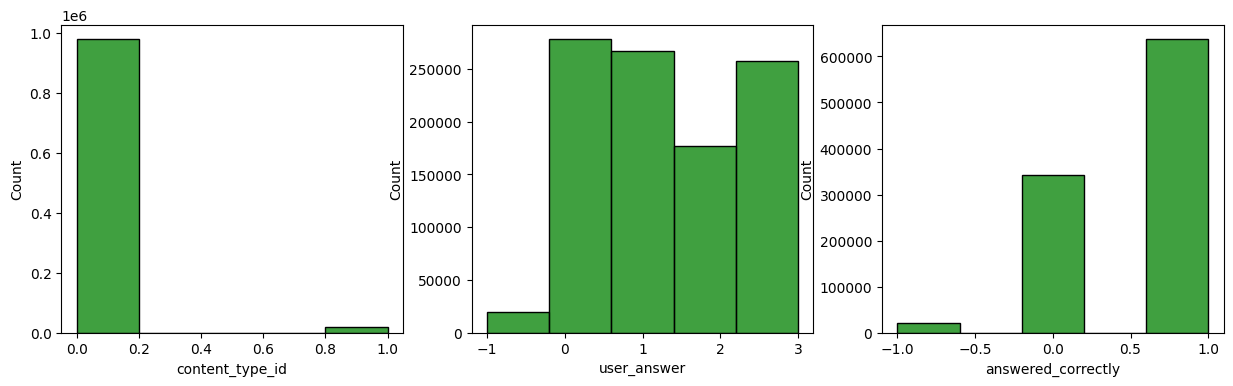

In [358]:
# Затем столбцы с "маленькими" значениями
num_col_small = ['content_type_id', 'user_answer', 'answered_correctly']
width = 3
height = int(np.ceil(len(num_col_small) / width))
fig, ax = plt.subplots(nrows = height, ncols = width, figsize = (15, 4))

for idx, column_name in enumerate(num_col_small):
    plt.subplot(height, width, idx + 1)
    sns.histplot(data = df, x = column_name, bins = 5, color = 'green')

### Проведём очистку данных

In [359]:
# Ищем пропуски в датафрейме df - есть 23723 в столбце времени ответа на каждый вопрос
# и 3816 в столбце просмотра объяснений и правильных ответов
df.isna().sum()

row_id                                0
timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                           0
answered_correctly                    0
prior_question_elapsed_time       23723
prior_question_had_explanation     3816
dtype: int64

In [360]:
# Выводим пропуски в столбце времени ответа на каждый вопрос. 
# Они обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.
df[df.prior_question_elapsed_time.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
89,89,653762,2746,6808,1,14,-1,-1,NaN,False
96,96,0,5382,5000,0,0,0,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
999762,999762,207265143,20938253,26404,1,308,-1,-1,NaN,False
999790,999790,208152685,20938253,22362,1,336,-1,-1,NaN,False
999859,999859,1142327350,20938253,1731,1,406,-1,-1,NaN,False
999901,999901,0,20948951,6040,0,0,3,0,NaN,NaN


In [361]:
# Выводим пропуски в столбце просмотра объяснений и правильных ответов. 
# Они обусловлены условием: имеет значение null для 1-го набора вопросов или лекции.
df[df.prior_question_had_explanation.isna()]

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
46,46,0,124,7900,0,0,0,1,NaN,NaN
76,76,0,2746,5273,0,0,1,0,NaN,NaN
96,96,0,5382,5000,0,0,0,1,NaN,NaN
224,224,0,8623,3915,0,0,3,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
998929,998929,0,20913319,6659,0,0,1,0,NaN,NaN
999345,999345,0,20913864,4790,0,0,1,1,NaN,NaN
999366,999366,0,20938253,7900,0,0,2,0,NaN,NaN
999901,999901,0,20948951,6040,0,0,3,0,NaN,NaN


In [362]:
df.duplicated().sum() # ищем дубликаты в датафрейме df - отсутствуют

0

In [363]:
df.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   row_id                          1000000 non-null  int64  
 1   timestamp                       1000000 non-null  int64  
 2   user_id                         1000000 non-null  int64  
 3   content_id                      1000000 non-null  int64  
 4   content_type_id                 1000000 non-null  int64  
 5   task_container_id               1000000 non-null  int64  
 6   user_answer                     1000000 non-null  int64  
 7   answered_correctly              1000000 non-null  int64  
 8   prior_question_elapsed_time     976277 non-null   float64
 9   prior_question_had_explanation  996184 non-null   object 
dtypes: float64(1), int64(8), object(1)
memory usage: 76.3+ MB


**Из представленных графиков и статистических данных можно сделать следующие выводы:**
- столбец **row_id** не несёт смысловой нагрузки для исследования и может быть "выкинут"
- датафрейм df занимает 76.3+ MB памяти
- имеет смысл изменить формат хранения некоторых данных для уменьшения объёма памяти, занимаемой датафреймом, и увеличения скорости исследования

In [364]:
df = df.drop('row_id', axis = 1) # выкидываем столбец идентификаторов строки
# Изменяем формат хранения некоторых данных датафрейма df
df['timestamp'] = df['timestamp'].astype('uint64')
df['user_id'] = df['user_id'].astype('uint32')
df['content_id'] = df['content_id'].astype('uint16')
df['content_type_id'] = df['content_type_id'].astype('int8')
df['task_container_id'] = df['task_container_id'].astype('uint16')
df['user_answer'] = df['user_answer'].astype('int8')
df['answered_correctly'] = df['answered_correctly'].astype('int8')
df['prior_question_elapsed_time'] = df['prior_question_elapsed_time'].astype('float32')
df.info() # выводим справку о кол-ве значений в каждом столбце и формате данных датафрейма df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  uint64 
 1   user_id                         1000000 non-null  uint32 
 2   content_id                      1000000 non-null  uint16 
 3   content_type_id                 1000000 non-null  int8   
 4   task_container_id               1000000 non-null  uint16 
 5   user_answer                     1000000 non-null  int8   
 6   answered_correctly              1000000 non-null  int8   
 7   prior_question_elapsed_time     976277 non-null   float32
 8   prior_question_had_explanation  996184 non-null   object 
dtypes: float32(1), int8(3), object(1), uint16(2), uint32(1), uint64(1)
memory usage: 29.6+ MB


In [388]:
# Выигрыш занимаемой датафреймом памяти после очистки данных
print(round(76.3 / 29.6, 1))

2.6


**После очистки данных объём памяти, занимаемой датафреймом, уменьшился с 76.3 до 29.6 MB, т.е. в 2.6 раза!**

### Рассмотрим корреляцию числовых признаков и их связь с успеваемостью студентов

In [366]:
cm = sns.color_palette("vlag", as_cmap = True)
df_corr = df.loc[:,['timestamp', 'user_id', 'content_id', 'content_type_id', 'task_container_id', 'user_answer', 'answered_correctly', 'prior_question_elapsed_time']]
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
timestamp,1.000000,-0.001041,0.032189,0.007441,0.364525,-0.001796,0.027571,0.016144
user_id,-0.001041,1.000000,-0.007103,0.004102,-0.072862,-0.002361,-0.014776,0.016981
content_id,0.032189,-0.007103,1.000000,0.420121,0.062908,-0.110374,-0.203327,0.149778
content_type_id,0.007441,0.004102,0.420121,1.000000,-0.013024,-0.283418,-0.438788,nan
task_container_id,0.364525,-0.072862,0.062908,-0.013024,1.000000,0.012135,0.039130,-0.043670
user_answer,-0.001796,-0.002361,-0.110374,-0.283418,0.012135,1.000000,0.126721,0.014283
answered_correctly,0.027571,-0.014776,-0.203327,-0.438788,0.039130,0.126721,1.000000,0.003251
prior_question_elapsed_time,0.016144,0.016981,0.149778,nan,-0.043670,0.014283,0.003251,1.000000


In [367]:
# Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
df_corr['cor_ratio'] = df_corr.answered_correctly / df_corr.user_answer
# Выведем новую корреляцию числовых признаков
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,cor_ratio
timestamp,1.000000,-0.001041,0.032189,0.007441,0.364525,-0.001796,0.027571,0.016144,0.032882
user_id,-0.001041,1.000000,-0.007103,0.004102,-0.072862,-0.002361,-0.014776,0.016981,-0.008364
content_id,0.032189,-0.007103,1.000000,0.420121,0.062908,-0.110374,-0.203327,0.149778,0.080741
content_type_id,0.007441,0.004102,0.420121,1.000000,-0.013024,-0.283418,-0.438788,nan,0.249123
task_container_id,0.364525,-0.072862,0.062908,-0.013024,1.000000,0.012135,0.039130,-0.043670,0.023179
user_answer,-0.001796,-0.002361,-0.110374,-0.283418,0.012135,1.000000,0.126721,0.014283,-0.527333
answered_correctly,0.027571,-0.014776,-0.203327,-0.438788,0.039130,0.126721,1.000000,0.003251,0.531547
prior_question_elapsed_time,0.016144,0.016981,0.149778,nan,-0.043670,0.014283,0.003251,1.000000,-0.006744
cor_ratio,0.032882,-0.008364,0.080741,0.249123,0.023179,-0.527333,0.531547,-0.006744,1.000000


In [368]:
# Удаляем ненужные столбцы, явно не связанные со столбцом успеваемости
df_corr.drop(df_corr.columns[[0, 1, 2, 4, 7]], axis = 1, inplace = True)
# Выведем обновлённую корреляцию числовых признаков
df_corr.corr().style.background_gradient(cmap = cm, vmin = -1, vmax = 1)

,content_type_id,user_answer,answered_correctly,cor_ratio
content_type_id,1.000000,-0.283418,-0.438788,0.249123
user_answer,-0.283418,1.000000,0.126721,-0.527333
answered_correctly,-0.438788,0.126721,1.000000,0.531547
cor_ratio,0.249123,-0.527333,0.531547,1.000000


<AxesSubplot: xlabel='cor_ratio', ylabel='Count'>

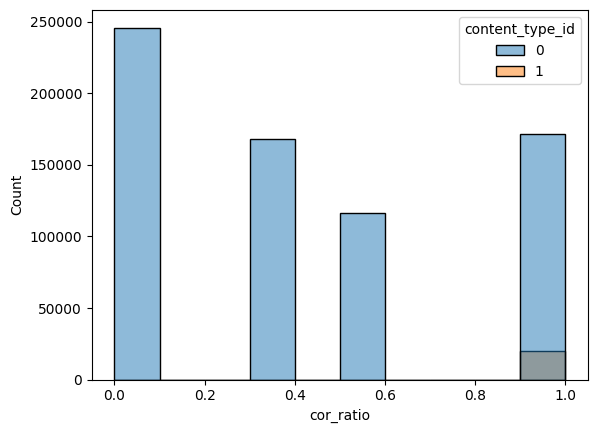

In [369]:
# Выводим распеределение успеваваемости студентов
sns.histplot(data = df_corr, x = 'cor_ratio', hue = 'content_type_id', bins = 10)

**По представленной корреляции числовых признаков видно, что помимо исходных для неё признаков успеваемость слабо зависит от типа контента (вопрос или лекция).**

### Рассмотрим статистику ответов студентов  

In [370]:
df.agg({'user_id': pd.Series.nunique}) # ищем кол-во уникальных идентификаторов студента

user_id    3824
dtype: int64

In [371]:
# Группируем общее кол-во ответов и кол-во правильных ответов каждого студента по его идентификатору в датафрейм us_a
us_a = df[['user_id', 'user_answer', 'answered_correctly']].groupby(['user_id'], as_index = False).sum()
us_a.head()


,user_id,user_answer,answered_correctly
0,115,72,32
1,124,49,7
2,2746,31,10
3,5382,169,81
4,8623,149,67


In [372]:
us_a.describe() # выводим статистику ответов студентов

,user_id,user_answer,answered_correctly
count,3.824000e+03,3824.000000,3824.000000
mean,1.050633e+07,359.514644,161.481172
std,5.958653e+06,984.492304,457.802761
min,1.150000e+02,1.000000,-2.000000
25%,5.363199e+06,38.000000,11.000000
50%,1.061051e+07,60.000000,23.000000
75%,1.565077e+07,219.000000,94.000000
max,2.094902e+07,16907.000000,6103.000000


In [373]:
# Сокращаем разброс количества ответов студентов
def rem_emission(df, col, k_std): # задаём функцию сокращения разброса ответов
        mean = df[col].mean() # среднее значение переданного столбца col
        std_o = df[col].std() # стандартное отклонение переданного столбца col
        return df[(df[col] <= mean + (k_std * std_o))]

us_a = rem_emission(us_a, 'user_answer', 1) # вызываем функцию сокращения разброса ответов
# Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
us_a['cor_ratio'] = us_a.answered_correctly / us_a.user_answer
us_a # выводим первые 5 и последние 5 строк полученного датафрейма us_a

,user_id,user_answer,answered_correctly,cor_ratio
0,115,72,32,0.444444
1,124,49,7,0.142857
2,2746,31,10,0.322581
3,5382,169,81,0.479290
4,8623,149,67,0.449664
...,...,...,...,...
3819,20913319,575,233,0.405217
3820,20913864,20,7,0.350000
3821,20938253,739,308,0.416779
3822,20948951,78,31,0.397436


In [374]:
us_a.describe() # выводим статистику ответов студентов с новым столбцом

,user_id,user_answer,answered_correctly,cor_ratio
count,3.585000e+03,3585.000000,3585.000000,3585.000000
mean,1.052197e+07,159.402789,68.483682,0.383755
std,5.961041e+06,238.836485,111.890436,0.131749
min,1.150000e+02,1.000000,-2.000000,-0.017241
25%,5.386918e+06,36.000000,11.000000,0.293103
50%,1.062930e+07,55.000000,21.000000,0.392857
75%,1.568217e+07,151.000000,66.000000,0.472603
max,2.094902e+07,1335.000000,759.000000,1.500000


### Вычисляем медианное значение количества ответов студентов

In [375]:
a_per_user_med = us_a.user_answer.median()
print('Медианное значение количества ответов студентов: ', a_per_user_med)

Медианное значение количества ответов студентов:  55.0


### Визуализируем данные о количестве ответов студентов

<AxesSubplot: xlabel='user_answer', ylabel='Count'>

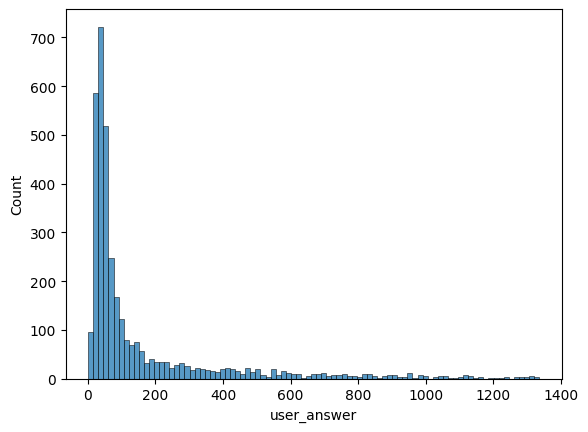

In [376]:
# Выводим распределение кол-ва ответов студентов: заметен перекос в начале
sns.histplot(data = us_a, x = 'user_answer')

<AxesSubplot: xlabel='user_answer', ylabel='Count'>

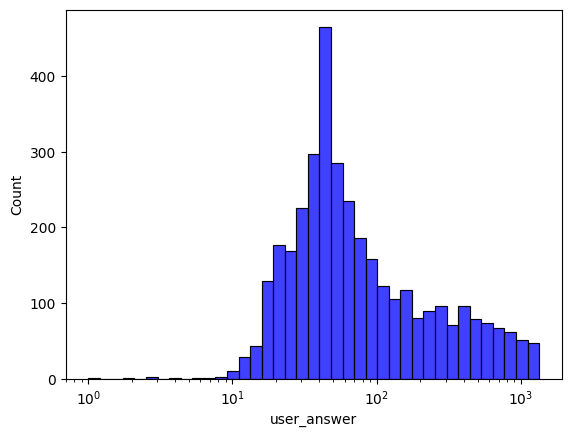

In [377]:
sns.histplot(data = us_a, x = 'user_answer', log_scale = True, color = 'blue') # нормализуем кол-во ответов студентов

0.42857142857142855


<AxesSubplot: >

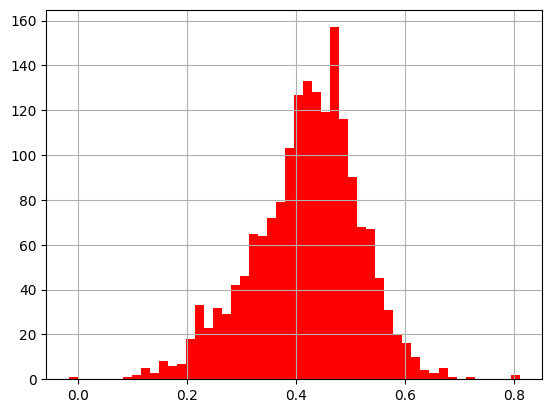

In [378]:
# Выводим распределение кол-ва ответов студентов, которое больше медианного
print(us_a.query('user_answer > 55')['cor_ratio'].median())
us_a.query('user_answer > 55')['cor_ratio'].hist(bins = 50, color = 'red')

0.4507042253521127


<AxesSubplot: >

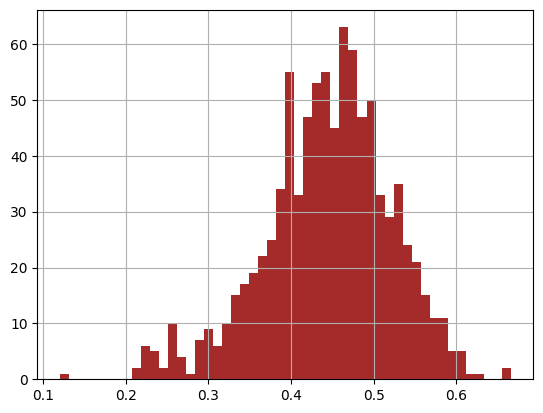

In [379]:
# Выводим распределение кол-ва ответов студентов, которое больше 75%
print(us_a.query('user_answer > 151')['cor_ratio'].median())
us_a.query('user_answer > 151')['cor_ratio'].hist(bins = 50, color = 'brown')

0.4578313253012048


<AxesSubplot: >

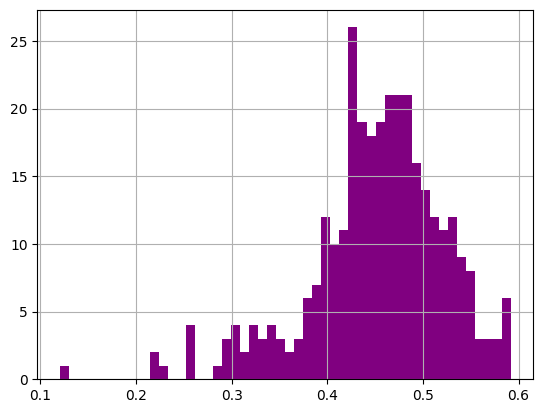

In [380]:
# Выводим распределение кол-ва ответов студентов, которое больше 500
print(us_a.query('user_answer > 500')['cor_ratio'].median())
us_a.query('user_answer > 500')['cor_ratio'].hist(bins = 50, color = 'purple')

0.3333333333333333


<AxesSubplot: >

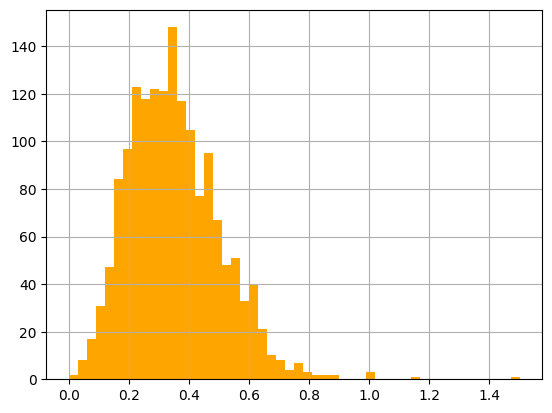

In [381]:
# Выводим распределение кол-ва ответов студентов, которое меньше 50
print(us_a.query('user_answer < 50')['cor_ratio'].median())
us_a.query('user_answer < 50')['cor_ratio'].hist(bins = 50, color = 'orange')

#### По представленным графикам видно, что студенты, ответившие на меньше медианного значения количества ответов, справлялись хуже тех, кто ответил больше медианного значения. При этом ответы в количестве гораздо большем медианного значения незначительно сказалось на увеличении числа правильных ответов.

## Поищем взаимосвязь времени между взаимодействием со студентом и завершением первого события от него, среднего времени ответа на каждый вопрос и количества правильных ответов с общим количеством ответов студентов

In [382]:
# Группируем общее кол-во ответов, кол-во правильных ответов и время ответа 
# на каждый вопрос студентов по их идентификаторам в датафрейм corr_look
corr_look = df[['user_id', 'user_answer', 'answered_correctly', 'timestamp', \
    'prior_question_elapsed_time']].groupby(['user_id'], as_index = False).sum()
# Добавляем столбец timestamp_ratio соотношения времени между взаимодействием со студентом 
# и завершением первого события от него к общему кол-ву ответов студентов
corr_look['timestamp_ratio'] = corr_look['timestamp'] / corr_look['user_answer']
# Добавляем столбец elapsed_time_ratio соотношения среднего времени ответа на каждый вопрос к общему кол-ву ответов студентов
corr_look['elapsed_time_ratio'] = corr_look['prior_question_elapsed_time'] / corr_look['user_answer']
# Добавляем столбец cor_ratio успеваемости (соотношения кол-ва правильных ответов к общему кол-ву ответов студентов)
corr_look['cor_ratio'] = corr_look.answered_correctly / corr_look.user_answer
# Удаляем ненужные столбцы
corr_look.drop(corr_look.columns[[0, 2, 3, 4]], axis = 1, inplace = True)
corr_look = rem_emission(corr_look, 'user_answer', 1) # вызываем функцию сокращения разброса ответов
corr_look # выводим первые 5 и последние 5 строк полученного датафрейма corr_look

,user_answer,timestamp_ratio,elapsed_time_ratio,cor_ratio
0,72,6.524638e+07,12458.319444,0.444444
1,49,2.252203e+05,11122.387755,0.142857
2,31,2.472123e+05,10483.870968,0.322581
3,169,2.879101e+08,26449.704142,0.479290
4,149,2.615750e+08,18923.489933,0.449664
...,...,...,...,...
3819,575,7.238333e+08,19102.003478,0.405217
3820,20,3.388405e+05,18200.000000,0.350000
3821,739,1.787103e+08,16015.966171,0.416779
3822,78,1.462367e+09,12730.769231,0.397436


In [383]:
# Ещё раз убеждаемся в отсутствии явной связи между успеваемостью и кол-вом ответов студентов

<AxesSubplot: xlabel='user_answer', ylabel='timestamp_ratio'>

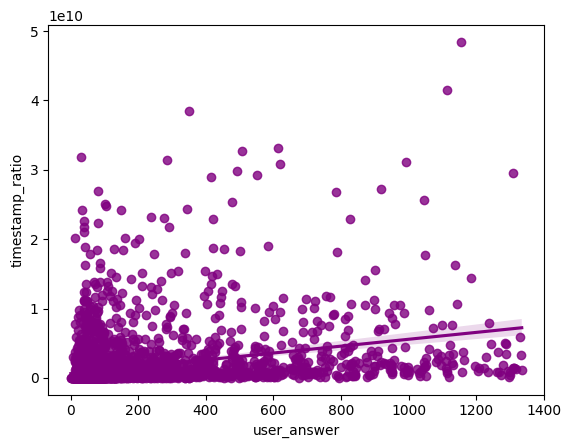

In [384]:
# Выводим соотношение timestamp_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = corr_look, x = 'user_answer', y = 'timestamp_ratio', color = 'purple')

<AxesSubplot: xlabel='user_answer', ylabel='elapsed_time_ratio'>

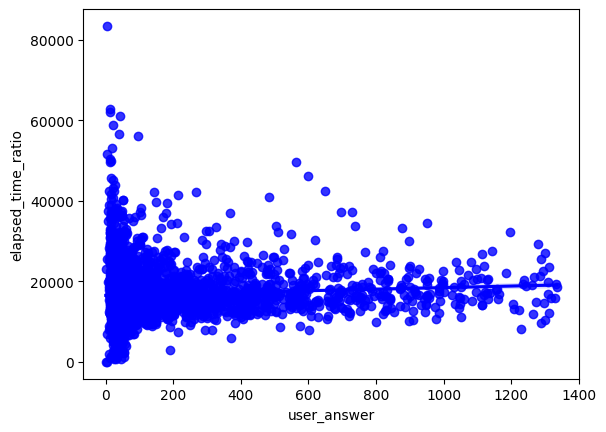

In [385]:
# Выводим соотношение elapsed_time_ratio к кол-ву ответов студентов: явной связи не видно
sns.regplot(data = corr_look, x = 'user_answer', y = 'elapsed_time_ratio', color = 'blue')

<AxesSubplot: xlabel='timestamp_ratio', ylabel='cor_ratio'>

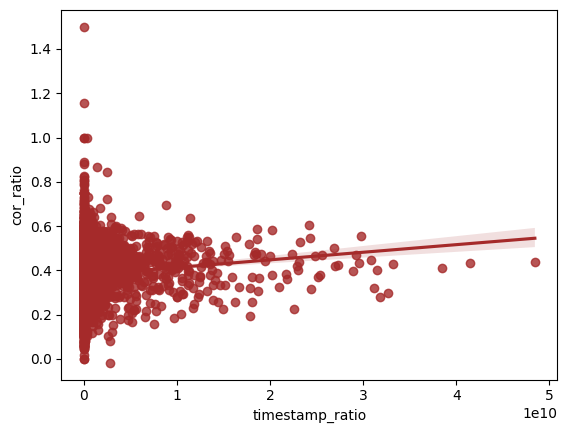

In [386]:
# Выводим соотношение timestamp_ratio к успеваемости: явной связи не видно
sns.regplot(data = corr_look, x = 'timestamp_ratio', y = 'cor_ratio', color = 'brown')

<AxesSubplot: xlabel='elapsed_time_ratio', ylabel='cor_ratio'>

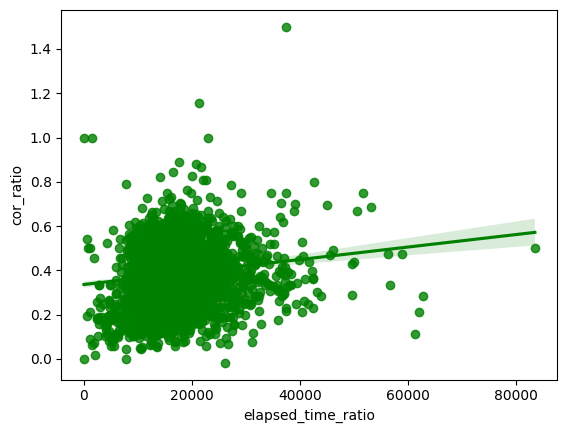

In [387]:
# Есть небольшая связь между elapsed_time_ratio и успеваемостью
sns.regplot(data = corr_look, x = 'elapsed_time_ratio', y = 'cor_ratio', color = 'green')

## Итак, на успеваемость студентов влияют следующие характеристики:
- количество ответов студентов, большее медианного значения количества ответов, равного 55
- типа контента (вопрос или лекция) - очень слабо
- соотношения количества правильных ответов и среднего времени ответа на каждый вопрос к общему количеству ответов студентов - слабо
